## Lab Assignment 2
### 210006819
---
[Nora Booth Github Repository](https://github.com/nb229-coder/210006819_Lab_Assignment_2)

#### Run this cell to connect to your GIS and get started:

In [2]:
from arcgis.gis import GIS
gis = GIS("home")

### Part 1: Python Basics

#### Task 1:
Create an If...Else statement that will test whether a number is divisible by three. "YOUR VALUE is divisible by 3" should be printed if the value is divisible by three. "YOUR VALUE is not divisible by three" should be printed if it is not divisible by three. Test the statement on a numeric
variable. Upper case text in the print statement should be replaced with the tested number.

In [3]:
# Identifying a numeric variable to test the statement
value_integer = 671
# Creating the If...Else statement
if value_integer % 3 == 0:
    print(f"{value_integer} is divisible by 3.")
else:
    print(f"{value_integer} is not divisible by 3.")
# The value_integer is not divisible by 3 therefore the statement followed ELSE

671 is not divisible by 3.


#### Task 2: 
Create an If...Else statement that will test whether a type of fruit, represented as a text string, is in a list of acceptable fruits (apple, orange, pear, kiwi, or strawberry). If the fruit is on the list, the
following should be printed: "YOUR FRUIT is acceptable." If not, then the following should be printed: "YOUR FRUIT is not acceptable." Upper case text in the print statement should be replaced with the tested fruit.



In [4]:
# First, generate a text string
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
# Check to make sure it is correct
print(fruits)
# Picking a test fruit 
fruit_test = "mango"
# Creating the If...Else statement
if fruit_test in fruits:
    print(f"{fruit_test} is acceptable.")
else:
    print(f"{fruit_test} is not acceptable.")
# Mango was not a fruit present on the list therefore it is not acceptable. 

['apple', 'orange', 'pear', 'kiwi', 'strawberry']
mango is not acceptable.


#### Task 3:
Create a function to calculate the distance between two coordinates using the haversine formula. Write the following formula where the input parameters are a pair of coordinates as two lists.

![Haversine Formula](https://community.esri.com/legacyfs/online/375715_Circle-trig6_svg.png)

The Haversine formula is the first equation to consider when calculating distances on a sphere. The word "Haversine" comes from the function:

                                    haversine(θ) = sin²(θ/2)

The following equation where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 
6,371km) is how we translate the above formula to include latitude and longitude coordinates (A 
and B are the pair of coordinates). Note that angles need to be in radians to pass to trig 
functions:

a = sin²(φB - φA/2) + cos φA * cos φB * sin²(λB - λA/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

λA = lonA
φA = latA
λB = lonB
φB = latB

Therefore, the simplified language of the function looks more like:

a = sin**(latB - latA/2) + cos latA * cos latB * sin**(lonB - lonA/2)

c = 2 * atan(a**0.5, (1-a)**0.5)

R = 6371

d = 6371 * c

In [5]:
import math as m
from math import radians, cos, sin, asin, atan, sqrt 

# Now all the functions that I will need are in this library
def haversine(lonA, latA, lonB, latB):
    lonA = radians(lonA)
    latA = radians(latA)
    lonB = radians(lonB)
    latB = radians(latB)
# ^Per the guidance on the workbook we first need to convert the degrees to radians to pass to trig functions
# Next, I need to  simplify the formula by finding the difference between both the longitudes and the latitudes
    dlon = lonB - lonA
    dlat = latB - latA
# Now I take each of the three steps to the equation to solve for 
    a = sin(dlat/2)**2 + cos(latA) * cos(latB) * sin(dlon/2)**2
    c = 2  * asin(sqrt(a))
    d = c * 6371
    return(d)
# Now I will input the coordinates I am using 
# For this step I decided to find the distance between the Irvine Building and Leuchars Train Station
distance = haversine(56.3418182, -2.7933043, 56.3751445, -2.8935131)
print(distance)
print(f"The distance between the Irvine Building and Leuchars Train Station is {distance} kilometres.")

11.741316834501253
The distance between the Irvine Building and Leuchars Train Station is 11.741316834501253 kilometres.


### Part 2: Pandas and NumPy

In [6]:
# Importing the necessary libraries
import pandas as pd
import numpy as np


In [7]:
# Reading the data from the CSVs
trees_df = pd.read_csv('/arcgis/home/portland_park_trees.csv')
print(trees_df.head())

   fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
0    1       426  2017/05/09    PSME  37.4      Fair       105.0        44.0   
1    2       427  2017/05/09    PSME  32.5      Fair        94.0        49.0   
2    3       428  2017/05/09    CRLA   9.7      Fair        23.0        28.0   
3    4       429  2017/05/09    QURU  10.3      Poor        28.0        38.0   
4    5       430  2017/05/09    PSME  33.2      Fair       102.0        43.0   

   CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0        57.0      staff  ...  Pseudotsuga       Douglas-fir   
1        45.0      staff  ...  Pseudotsuga       Douglas-fir   
2        27.0      staff  ...    Crataegus  Lavalle hawthorn   
3        31.0      staff  ...      Quercus  northern red oak   
4        44.0      staff  ...  Pseudotsuga       Douglas-fir   

              Genus_spec Functional Size Native Edible Nuisance  \
0  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   


#### Q1: How many trees are of the Quercus or Acer genus?

In [8]:
# Select for Quercus or Acer
qrc_acr_trees = trees_df[trees_df['Genus'].isin(['Quercus', 'Acer'])]
# Count the number of trees
tree_count = qrc_acr_trees.shape[0]
print(f"Number of trees of the Quercus or Acer genus: {tree_count}")


Number of trees of the Quercus or Acer genus: 5675


#### Q2: How many trees are of the Quercus or Acer genus and have a DBH larger than 50 inches?

In [9]:
# Filter the dataframe for just Quercus or Acer genus and DBH greater than 50 inches
large_qrc_acr = trees_df.query('Genus in ["Quercus", "Acer"] & DBH > 50')
# Count the selected trees
large_trees = large_qrc_acr.shape[0]
print(f"Number of Quercus or Acer genus trees with a DBH > 50: {large_trees}")

Number of Quercus or Acer genus trees with a DBH > 50: 124


#### Q3: Which genus has the highest mean DBH of the following genera: Quercus, Acer, or Fraxinus?

In [10]:
# First I want to select only trees with a genus of Quercus, Acer, or Fraxinus
# I am going to create a separate dataframe for this to simplify things
QAF_df = trees_df.query("Genus in ['Quercus', 'Acer', 'Fraxinus']")
# Calculate the mean DBH for each of the three selected 
mean_genus_dbh = QAF_df.groupby('Genus')['DBH'].mean()
#Solve for the highest mean DBH
genus_highest_mean = mean_genus_dbh.idxmax()

print(f"The genus with the highest mean DBH is: {genus_highest_mean}")
print(f"{mean_genus_dbh[genus_highest_mean]} inches")

The genus with the highest mean DBH is: Quercus
23.56823839157492 inches


#### Q4: How many different species of trees are recorded in the Acer genus? 

In [11]:
# Filter the dataframe just for the rows where the genus is Acer
acer_df = trees_df[trees_df['Genus'] == 'Acer']
#.Describe shows the unique species count
acer_species = acer_df['Genus_spec'].describe()
# Now I can extract the unique count from the summary statistics 
species_count = acer_species['unique']
print(f"There are {species_count} different species recorded for the Acer genus in this dataset.")

There are 20 different species recorded for the Acer genus in this dataset.


##### The next step is to incorporate the world_cities.csv

In [12]:
world_cities_df = pd.read_csv('/arcgis/home/world_cities.csv')
print(world_cities_df.head())

                 city    country    pop    lat    lon  capital
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0
4               'Abud  Palestine   2456  32.03  35.07        0


#### Q5: 
a. Calculate a new column named "pop_M" (population in millions), by transforming the 
"pop" (population) column.

b. Remove the original "pop" column.

c. Choose/subset a city that starts with the same letter as your first name (for example, 
"Mexico City" if your first name is Michael).

d. Subset the five biggest (i.e., largest population sizes) cities from the country where your 
selected city is.

e. Print the result.

f. Make sure you write the scripts in different code cells where you describe the process.

##### a. Calculate a new column named "pop_M" (population in millions), by transforming the "pop" (population) column

In [13]:
# Creating a new for population in millions column using the data from an existing column
world_cities_df['pop_M'] = world_cities_df['pop'] / 1000000
world_cities_df.head()

,city,country,pop,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,5629,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,18999,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,47788,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,21817,29.36,47.98,0,0.021817
4,'Abud,Palestine,2456,32.03,35.07,0,0.002456


##### b. Remove the original "pop" column.

In [14]:
del world_cities_df['pop']
world_cities_df.head()

,city,country,lat,lon,capital,pop_M
0,'Abasan al-Jadidah,Palestine,31.31,34.34,0,0.005629
1,'Abasan al-Kabirah,Palestine,31.32,34.35,0,0.018999
2,'Abdul Hakim,Pakistan,30.55,72.11,0,0.047788
3,'Abdullah-as-Salam,Kuwait,29.36,47.98,0,0.021817
4,'Abud,Palestine,32.03,35.07,0,0.002456


##### c. Choose/subset a city that starts with the same letter as your first name (for example, "Mexico City" if your first name is Michael).

I was unsure if this question requires me to isolate the city using coding or just inspection of the csv file. I did not recognize the coding that this would require so I did have to do extra research to learn how to properly use the '.str.startswith' function. I have cited the Python library resource that I used to assist with this question below. 

Python Software Foundation. (n.d.) *Built-in types*. Available at: https://docs.python.org/3/library/stdtypes.html#str.startswith (Accessed: 16 November 2024).

In [15]:
# Find the cities that start with the letter 'N'
N_cities = world_cities_df[world_cities_df['city'].str.startswith('N')]
print(N_cities)

                  city   country    lat     lon  capital     pop_M
25100        N'Djamena      Chad  12.11   15.05        1  0.737281
25101         N'Guigmi     Niger  14.25   13.12        0  0.018459
25102      N'dalatando    Angola  -9.30   14.91        0  0.021270
25103           N'zeto    Angola  -7.23   12.86        0  0.019732
25104         Na Klang  Thailand  17.31  102.18        0  0.031333
...                ...       ...    ...     ...      ...       ...
26736  Nyzhni Sirohozy   Ukraine  46.84   34.38        0  0.005744
26737   Nyzhnya Krynka   Ukraine  48.11   38.17        0  0.014123
26738            Nzara     Sudan   4.64   28.25        0  0.000000
26739            Nzega  Tanzania  -4.21   33.18        0  0.027350
26740        Nzerekore    Guinea   7.76   -8.83        0  0.135723

[1641 rows x 6 columns]


The city I chose to select was Nzega, Tanzania (26739).

#### d. Subset the five biggest (i.e., largest population sizes) cities from the country where your selected city is.

In [16]:
# Now, I need to find the five most populated cities from Tanzania
# Extract cities from Tanzania
tanzania_cities = world_cities_df[world_cities_df['country'] == 'Tanzania']
# Now I need to sort the cities in Tanzania by population from most populated to least populated
top_cities = tanzania_cities.sort_values(by='pop_M', ascending =False)
# I use the .head function to show the top 5 most populated cities in Tanzania
top_5_cities = top_cities.head(5)
print(top_5_cities)

                city   country   lat    lon  capital     pop_M
8837   Dar es Salaam  Tanzania -6.82  39.28        0  2.805523
25053         Mwanza  Tanzania -2.52  32.89        0  0.458070
42665       Zanzibar  Tanzania -6.16  39.20        0  0.422300
2085          Arusha  Tanzania -3.36  36.67        0  0.362904
23269          Mbeya  Tanzania -8.89  33.43        0  0.304155


### Part 3: Python Data Visualization

In [17]:
# Initialise
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### GRAPH 1:  Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis and tree height mapped to the y-axis (Hint: You will need to use the “Genus”, “DBH”, and “TreeHeight” attributes.). 

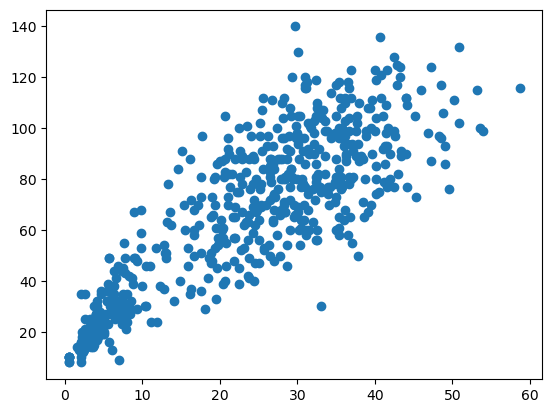

In [25]:
# This exercise uses the same dataframe that was used in Part 2 termed 'trees_df' so we will be using this
# First I want to make a dataframe that only looks at the Ulmus genus
ulmus_df = trees_df.query("Genus in ['Ulmus']")
ulmus_df.head()
# Ok now that I have a dataframe that only assesses trees with the genus Ulmus I can create a scatterplot
graph1 = plt.scatter(data=ulmus_df, x='DBH', y='TreeHeight')

#### GRAPH 2:  Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue (Hint: You will need to use the “Genus”, “Genus_spec”, “DBH”, and “TreeHeight” attributes.)

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

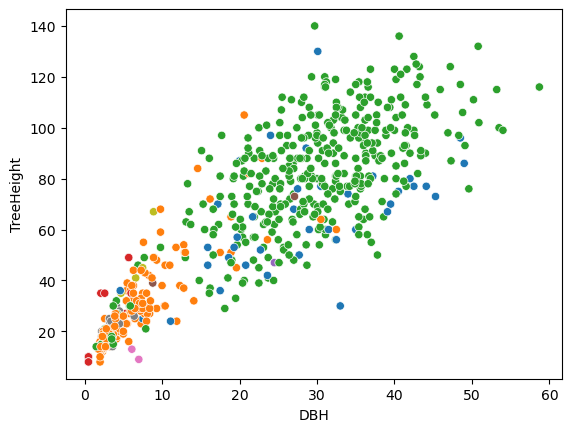

In [26]:
# I mixed between sns for the second graph because it was easier to navigate how to change the hue based on the categoical variable of species
sns.scatterplot(data=ulmus_df, x='DBH', y='TreeHeight', hue='Genus_spec', legend=False)

#### GRAPH 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species should have its own boxplot)

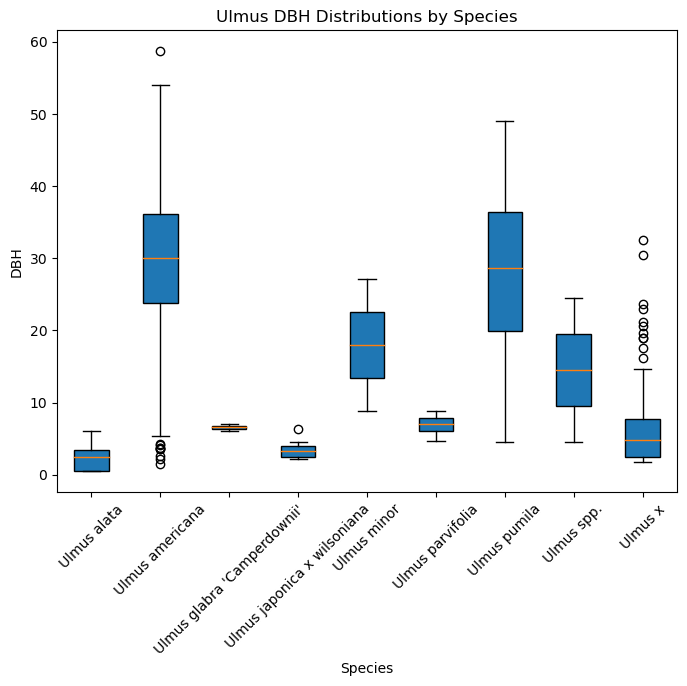

In [41]:
ulmus_by_species = ulmus_df.groupby('Genus_spec') ['DBH'].apply(list)
plt.figure(figsize=(8,6))
graph3 = plt.boxplot(ulmus_by_species, labels=ulmus_by_species.index, patch_artist='unique')
plt.xlabel('Species')
plt.ylabel('DBH')
plt.title('Ulmus DBH Distributions by Species')
plt.xticks(rotation=45)
# Also we need to remove the legend for this graph
plt.legend([], [], frameon=False)
fig.patch.set_facecolor('#adb7c7')
plt.show()

Initially, I had trouble figuring out how to read the labels along the x axis so I had to use further research to learn how to turn the labels so that you could read them. I have cited the sources I used below.

Varshney, T. (2020) 'How xticks and xticklabels really work: A walkthrough', *Towards Data Science*, 7 September, Available at: https://towardsdatascience.com/how-xticks-and-xticklabels-really-work-a-walkthrough-aff80755838 (Accessed: 16 November 2024).

Seaborn Development Team (n.d.) 'seaborn,scatterplot', *Seaborn Documentation*, Available at: https://seaborn.pydata.org/generated/seaborn.scatterplot.html (Accessed 16 November 2024).

#### GRAPH 4: Combine Graphs 1 and 3 into a single figure. Do not plot a legend for any of the graphs

Text(0, 0.5, 'DBH')

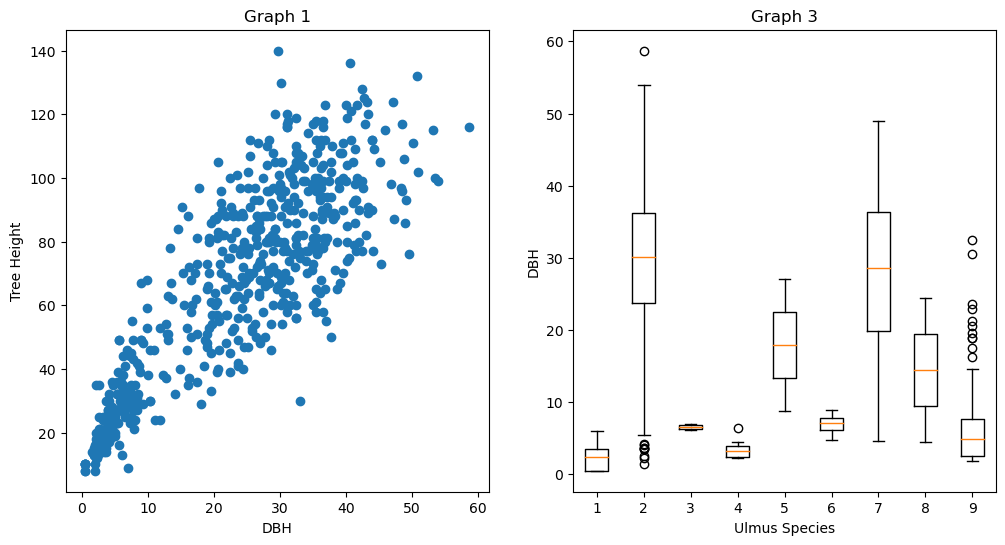

In [55]:
# I couldn't find a way to do this just using seaborn so I am combining it with matplotlib to combine these graphs
plt.rcParams['figure.figsize'] = [12, 6]
fig, axes = plt.subplots(1,2, figsize=(12,6))

axes[0].scatter(data=ulmus_df, x='DBH', y='TreeHeight')
axes[0].set_title('Graph 1')
axes[0].set_xlabel('DBH')
axes[0].set_ylabel('Tree Height')

axes[1].boxplot(ulmus_by_species)
axes[1].set_title('Graph 3')
axes[1].set_xlabel('Ulmus Species')
axes[1].set_ylabel('DBH')
# Ok now that I have a dataframe that only assesses trees with the genus Ulmus I can create a scatterplot


### Part 4: Python GeoPandas

In [ ]:
!pip install geopandas
import geopandas as gpd
print(gpd)

!pip install mapclassify
import mapclassify as mpc
print (mpc)
!pip install contextily
import contextily as ctx
print(ctx)

#### Task 1: Read the dataset(shapefile) you download as GeoPandas DataFrame

In [ ]:
shapefile_path = "SG_FloodDisadvantage_2015.shp"
flood_risk_gdf = gpd.read_file('/arcgis/home/SG_FloodDisadvantage_2015.shp')
print(flood_risk_gdf)
print(shapefile_path)
# In order for this to work all seven file types from the zip need to be uploaded into the Files environment
# Now I want to do this for the other essential elements of the zip file including .shx, .dbf. and .prj
shx_path = "SG_FloodDisadvantage_2015.shx"
shx_gdf = gpd.read_file('/arcgis/home/SG_FloodDisadvantage_2015.shx')
print(shx_gdf)
print(shx_path)

dbf_path = "SG_FloodDisadvantage_2015.dbf"
dbf_gdf = gpd.read_file('/arcgis/home/SG_FloodDisadvantage_2015.dbf')
print(dbf_gdf)
print(dbf_path)


#### T2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.

In [ ]:
# I want to know what this data looks like so first I'll just plot the whole thing
flood_risk_gdf.plot()
#This doesnt really tell us anything about urban vs rural spaces so let's try to adapt this map to show more information
# This is hard to interpret so I need to fix it up so we can see the different areas
flood_risk_gdf.plot(cmap="viridis", linewidth=0.2)
# From looking at the Layer data on the Spatial Data Portal of Scotland I found that UR6Class is the name of the variable that determines what type of classification each area is on the map

In [ ]:
# OK, so now that we know what the geodataframe looks like we can ask it to plot the first and last five records
# Here is the general table of values
flood_risk_gdf.head()
# Now I want to select the first records in the dataframe
top_sample = flood_risk_gdf.head(5)
print(top_sample)
top_sample.plot(cmap="viridis", edgecolor="black",linewidth=0.2)
plt.show()

In [ ]:
# Now for the last five and then I will combine them
bottom_sample = flood_risk_gdf.tail(5)
print(bottom_sample)
bottom_sample.plot(cmap="viridis",edgecolor="black",linewidth=0.2)
plt.show()

In [ ]:
# Now I need to take the top and bottom dataframes using pandas and combine them into one before we can use the .explore function
combined_gdf = pd.concat([top_sample, bottom_sample], ignore_index=True)
print(combined_gdf)

In [ ]:
# Now to take the combined gdf and map it
combined_gdf.plot(cmap="viridis",edgecolor="black",linewidth=0.2)
plt.show()

#### T3. Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip

In [ ]:
!pip install folium matplotlib mapclassify
# I originally got an error message when trying to run .explore function and it told me to install the packages below
import folium as fl
import matplotlib as mpl
import mapclassify as mpc

In [ ]:
flood_risk_gdf.explore(columm='zvuln_cl', cmap="viridis")
# Because these are quite small datazones you have to zoom the areas of Linlithgow and just south of Aberdeen
# The variable ' zvuln_cl' is a categorical variable with 6 potential classes that determines overall flood disadvantage (any type of flooding)

#### T4. What is the Coordinate Reference System of the selected dataset?


In [ ]:
print(flood_risk_gdf.crs)
print(f"{flood_risk_gdf.crs} is the coordinate reference system of this dataframe.")

#### T5. How many features does the selected dataset contain?

In [ ]:
# The selected dataset has fewer entries, yes but the features number the same with the whole dataset
features = len(flood_risk_gdf)
print(f"The dataset contains {features} features.")


#### T6. Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a categorical attribute.

In [ ]:
# I have already shown this data based on the catgorical variable of overall vulnerability to flooding of any type but I will be switching the mapping to the capacity for recovery AKA 'adaptive capacity'. The variable is 'Za_reco_cl'
# First I want to make it its own dataframe with reduced columns
# SUBSET THE DATA
recovery_gdf = flood_risk_gdf[["DZ_CODE", "DZ_NAME", "CouncilAre", "local_auth", "area", "Za_reco_cl"]]
recovery_gdf.head()
print(recovery_gdf)


In [ ]:
# FILTER THE ROWS
poor_recovery_capacity = recovery_gdf['Za_reco_cl'] == 'Extremely low'
poor_recovery_capacity.head()
poor_recovery_count = poor_recovery_capacity.sum()

print(f"There are {poor_recovery_count} datazones out of 6500 that have an 'Extremely low' capacity for recovery from flooding or flood-related incidences.")

#### T7. Define a sub-setting filter to create a new geopandas dataframe where you filter the selected dataset based on a numerical attribute.

In [ ]:
# First I want to make it its own dataframe with reduced columns
# SUBSET THE DATA
# Select one of the columns containing numerical data
# This dataset consideres a variety of social factors that predispose certain people to vulnerability to flooding, the factor I consider is the Percentage of people income deprived (Scottish Index of Multiple Deprivation 2012 – Income; from 2013 disadvantage assessment)
# This is called i10_pc in the dataset

i10_gdf = flood_risk_gdf[["DZ_CODE", "DZ_NAME", "CouncilAre", "local_auth", "area", "i10_PC"]]
print(i10_gdf)


In [ ]:
# FILTER THE ROWS based on the numerical attribute
i10_over50 = i10_gdf['i10_PC'] > 75
i10_count = i10_over50.sum()

print(f"There are {i10_count} datazones out of 6500 with over 75% of people that can be defined as income deprived (SIMD 2012 - Income).")

#### T8. Plot the new/filtered geopandas dataframe using one of the attributes to create a choropleth map.

In [ ]:
# This first graph I tried is showing up with a legend that is in alphabetical order rather than from highest to lowest vulnerability so I need to reorder the variables
risk_order = ['Slight', 'Extremely low', 'Relatively low', 'Average', 'Relatively high', 'Extremely high', 'Acute']
flood_risk_gdf['Za_reco_cl'] = pd.Categorical(flood_risk_gdf['Za_reco_cl'], categories= risk_order, ordered=True)

flood_risk_gdf.plot(column= 'Za_reco_cl',cmap='YlOrRd', legend=True, legend_kwds={'title': 'Flood Recovery Capacity'}, figsize=(10,10))
plt.show()

### Part 5: Python Rasterrio

In [ ]:
!pip install earthpy
import earthpy as epy
import earthpy.spatial as es
import earthpy.plot as ep
!pip install rasterio
import rasterio as rio
%matplotlib inline
print(mpl)

#### Task 1. Read the file as a rasterio dataset

In [ ]:
elev = rio.open('/arcgis/home/elev.tif')
print(elev.name)

#### T2: What is the CRS of the dataset?

In [ ]:
print(elev.crs)
print(f"{elev.crs} is the coordinate reference system of the elev dataframe.")

#### T3: Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.

In [ ]:
print(elev.bounds)
print(elev.crs)
print(elev.count)


In [ ]:
print(f"Bounds: {elev.bounds}")
print(f"CRS: {elev.crs}")
print(f"Number of bands: {elev.count}")

#### T4: Create a plot/map of the raster dataset.

In [ ]:
# Following the Rasterio Guide to read elev into a NumPy array
elev_arr = elev.read()
elev_arr
# Now I've made it into an array, I want to understand the shape 
print(elev_arr.shape)

In [ ]:
elev_band = elev.read(1)
print(elev_band)
plt.rcParams['figure.figsize'] = [10,8]
plt.imshow(elev_band, cmap="gist_earth")
plt.show()

#### T5: Create Histograms from the raster.

In [ ]:
from rasterio.plot import show_hist
show_hist(elev, bins=50, lw=0.0, stacked=False, alpha=0.3, histtype='stepfilled',title=" NED Digital Elevation Model of Canada")

In [ ]:
#### There is only 1 band therefore only one histogram can be generated